In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the Boston Housing dataset
data = fetch_openml(data_id=531)



In [3]:
print(data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [4]:
data.data.shape

(506, 13)

In [5]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)



In [6]:
y_test.shape

(102,)

In [7]:
scaler_X = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [8]:
from PSO_UQ1 import PSO_UQ
from GA_UQ1 import GA_UQ
PSO_fitnesses=[]
GA_instances=[]

In [9]:
import time as t
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np
def run_once(name, model, X_train_scaled, y_train, X_test_scaled, y_test):
    import time as t
    from sklearn.metrics import r2_score, mean_squared_error
    import numpy as np

    model.fit(X_train_scaled, y_train)
    y_test_pred = model.predict(X_test_scaled)

    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred) ** 0.5

    start_time = t.time()
    solution, solution_fitness, ga_instance = GA_UQ(list(y_test_pred), list(y_test))
    ga_duration = t.time() - start_time
    a_ga, b_ga = solution
    lower_ga = y_test_pred - b_ga
    upper_ga = y_test_pred + a_ga
    picp_ga = np.mean((y_test >= lower_ga) & (y_test <= upper_ga))
    mpiw_ga = np.mean(upper_ga - lower_ga)

    start_time = t.time()
    pos, cost, optimizer, fitness = PSO_UQ(list(y_test_pred), list(y_test))
    pso_duration = t.time() - start_time
    a_pso, b_pso = pos
    lower_pso = y_test_pred - b_pso
    upper_pso = y_test_pred + a_pso
    picp_pso = np.mean((y_test >= lower_pso) & (y_test <= upper_pso))
    mpiw_pso = np.mean(upper_pso - lower_pso)

    # Optionally track instances
    PSO_fitnesses.append(fitness)
    GA_instances.append(ga_instance)

    return {
        "Model": name,
        "R2": test_r2,
        "RMSE": test_rmse,
        "a_PSO": a_pso,
        "b_PSO": b_pso,
        "Fitness_PSO": -cost,
        "PICP_PSO": picp_pso,
        "MPIW_PSO": mpiw_pso,
        "time_PSO": pso_duration,
        "a_GA": a_ga,
        "b_GA": b_ga,
        "Fitness_GA": solution_fitness,
        "PICP_GA": picp_ga,
        "MPIW_GA": mpiw_ga,
        "time_GA": ga_duration
    }


In [10]:
results = []
def trainAndreport(name,model,N_RUNS=30):
    global results
    for i in range(N_RUNS):
        print(f"Run {i+1}/{N_RUNS}")
        result = run_once(name, model, X_train_scaled, y_train, X_test_scaled, y_test)
        results.append(result)



In [11]:
from sklearn.linear_model import LinearRegression
trainAndreport("Linear Regression",LinearRegression())

Run 1/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 2/30


2025-05-19 16:04:05,254 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:05,547 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125397916, best pos: [6.59737292 6.7500971 ]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 3/30


2025-05-19 16:04:05,833 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:06,154 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125404945, best pos: [6.59736317 6.75010006]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 4/30


2025-05-19 16:04:06,439 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:06,710 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125413633, best pos: [6.59735906 6.75007476]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 5/30


2025-05-19 16:04:06,975 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:07,281 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125419254, best pos: [6.59735576 6.75007832]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 6/30


2025-05-19 16:04:07,629 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:07,929 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125381757, best pos: [6.59736929 6.75006767]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 7/30


2025-05-19 16:04:08,223 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:08,550 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125413235, best pos: [6.59735781 6.75007394]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 8/30


2025-05-19 16:04:08,841 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:09,116 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125416002, best pos: [6.59736069 6.75009353]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 9/30


2025-05-19 16:04:09,388 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:09,703 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125416333, best pos: [6.59735534 6.75009297]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 10/30


2025-05-19 16:04:09,994 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:10,333 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125420936, best pos: [6.59735288 6.75008482]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 11/30


2025-05-19 16:04:10,614 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:10,875 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0063851901254143245, best pos: [6.59736491 6.7500808 ]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\Ap

Run 12/30


2025-05-19 16:04:11,135 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:11,411 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125412425, best pos: [6.59736008 6.75007452]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 13/30


2025-05-19 16:04:11,681 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:11,990 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.00638519012542024, best pos: [6.59735544 6.75008889]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppD

Run 14/30


2025-05-19 16:04:12,252 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:12,525 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125311219, best pos: [6.59732038 6.7500934 ]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 15/30


2025-05-19 16:04:12,802 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:13,083 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125376923, best pos: [6.59737546 6.75010604]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 16/30


2025-05-19 16:04:13,345 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:13,617 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125420559, best pos: [6.59735585 6.75008855]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 17/30


2025-05-19 16:04:13,884 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:14,197 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125415009, best pos: [6.59734824 6.75007657]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 18/30


2025-05-19 16:04:14,466 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:14,736 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190124877142, best pos: [6.59737205 6.75017473]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 19/30


2025-05-19 16:04:15,016 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:15,283 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0063851901253708255, best pos: [6.59738001 6.75007708]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\Ap

Run 20/30


2025-05-19 16:04:15,567 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:15,830 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125420031, best pos: [6.59736124 6.75008697]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 21/30


2025-05-19 16:04:16,095 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:16,415 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125421783, best pos: [6.59735615 6.75008372]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 22/30


2025-05-19 16:04:16,691 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:16,986 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125414728, best pos: [6.59736625 6.75008483]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 23/30


2025-05-19 16:04:17,264 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:17,530 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.00638519012542181, best pos: [6.59735592 6.75008455]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppD

Run 24/30


2025-05-19 16:04:17,811 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:18,106 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125268532, best pos: [6.59732868 6.75011532]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 25/30


2025-05-19 16:04:18,395 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:18,715 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125321575, best pos: [6.59733979 6.75011426]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 26/30


2025-05-19 16:04:19,004 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:19,312 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125420931, best pos: [6.59735376 6.75008127]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 27/30


2025-05-19 16:04:19,591 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:19,859 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125410641, best pos: [6.59735169 6.75007156]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 28/30


2025-05-19 16:04:20,132 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:20,391 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125419831, best pos: [6.59736167 6.75008545]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 29/30


2025-05-19 16:04:20,729 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:21,007 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.006385190125421557, best pos: [6.59735822 6.75008527]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 30/30


2025-05-19 16:04:21,277 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00639
2025-05-19 16:04:21,555 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0063851901252596115, best pos: [6.59730808 6.75006447]


In [12]:
from sklearn.svm import SVR
trainAndreport("SVR",SVR())


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 1/30


2025-05-19 16:04:21,848 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:22,124 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978146294, best pos: [4.70699519 5.3618997 ]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 2/30


2025-05-19 16:04:22,395 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:22,657 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978085695, best pos: [4.70699228 5.36189204]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 3/30


2025-05-19 16:04:22,935 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:23,253 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978235672, best pos: [4.70700686 5.36191868]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 4/30


2025-05-19 16:04:23,548 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:23,809 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978244112, best pos: [4.70701358 5.36191889]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 5/30


2025-05-19 16:04:24,081 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:24,348 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978237207, best pos: [4.7070165  5.36191473]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 6/30


2025-05-19 16:04:24,623 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:24,883 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447973674807, best pos: [4.70717208 5.36190772]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 7/30


2025-05-19 16:04:25,156 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:25,422 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978241634, best pos: [4.70701408 5.36192489]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 8/30


2025-05-19 16:04:25,719 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:25,979 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.00832144797820174, best pos: [4.70702061 5.36193756]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppD

Run 9/30


2025-05-19 16:04:26,249 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:26,570 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978176934, best pos: [4.70699439 5.36191972]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 10/30


2025-05-19 16:04:26,842 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:27,100 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978237593, best pos: [4.70701217 5.36192642]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 11/30


2025-05-19 16:04:27,398 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:27,669 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978243877, best pos: [4.70701618 5.361921  ]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 12/30


2025-05-19 16:04:27,948 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:28,213 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447976641305, best pos: [4.70691608 5.36188416]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 13/30


2025-05-19 16:04:28,515 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:28,901 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321445628080617, best pos: [4.70792597 5.36595293]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 14/30


2025-05-19 16:04:29,198 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:29,462 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447977992032, best pos: [4.70697891 5.36192875]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 15/30


2025-05-19 16:04:29,751 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:30,067 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978092469, best pos: [4.70704187 5.36194085]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 16/30


2025-05-19 16:04:30,347 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:30,616 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.00832144797824386, best pos: [4.7070147  5.36192274]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppD

Run 17/30


2025-05-19 16:04:30,897 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:31,152 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978244054, best pos: [4.70701435 5.36191888]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 18/30


2025-05-19 16:04:31,437 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:31,710 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978096603, best pos: [4.70704288 5.36193711]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 19/30


2025-05-19 16:04:31,995 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:32,266 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978026178, best pos: [4.70702343 5.36195943]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 20/30


2025-05-19 16:04:32,547 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:32,814 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978241667, best pos: [4.70701011 5.36192038]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 21/30


2025-05-19 16:04:33,081 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:33,337 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978242257, best pos: [4.70701059 5.3619187 ]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 22/30


2025-05-19 16:04:33,663 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:33,949 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978233589, best pos: [4.70701748 5.36191375]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 23/30


2025-05-19 16:04:34,276 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:34,560 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447945953912, best pos: [4.70745393 5.36198463]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 24/30


2025-05-19 16:04:34,842 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:35,111 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978138751, best pos: [4.70702656 5.36194672]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 25/30


2025-05-19 16:04:35,402 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:35,677 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978244412, best pos: [4.70701488 5.36192131]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 26/30


2025-05-19 16:04:35,952 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:36,220 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978037614, best pos: [4.70697891 5.36191462]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 27/30


2025-05-19 16:04:36,598 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:36,865 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978166457, best pos: [4.70699299 5.36192008]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 28/30


2025-05-19 16:04:37,147 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:37,411 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978207698, best pos: [4.7069999  5.36191227]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 29/30


2025-05-19 16:04:37,748 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:38,247 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978228712, best pos: [4.70701663 5.36191142]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 30/30


2025-05-19 16:04:38,617 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00832
2025-05-19 16:04:38,920 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.008321447978192419, best pos: [4.70702108 5.36193936]


In [13]:
from sklearn.ensemble import RandomForestRegressor
trainAndreport("Random Forest", RandomForestRegressor(random_state=42))

Run 1/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 2/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 3/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 4/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 5/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 6/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 7/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 8/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 9/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 10/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 11/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 12/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 13/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 14/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 15/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 16/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 17/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 18/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 19/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 20/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 21/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 22/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 23/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 24/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 25/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 26/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 27/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 28/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 29/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 30/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
trainAndreport("GradientBoostingRegressor", GradientBoostingRegressor(random_state=42))

c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 1/30


2025-05-19 16:05:14,641 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:14,933 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738435882, best pos: [5.0517774  5.46964291]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 2/30


2025-05-19 16:05:15,344 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:15,650 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738739542, best pos: [5.05180379 5.46968986]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 3/30


2025-05-19 16:05:16,070 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:16,334 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738737922, best pos: [5.05179463 5.46967806]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 4/30


2025-05-19 16:05:16,770 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:17,117 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738738893, best pos: [5.05179171 5.46968448]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 5/30


2025-05-19 16:05:17,624 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:17,975 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.00995067973874397, best pos: [5.05179518 5.46968185]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppD

Run 6/30


2025-05-19 16:05:18,428 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:18,808 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738704536, best pos: [5.05178307 5.46968403]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 7/30


2025-05-19 16:05:19,246 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:19,594 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738715773, best pos: [5.05180917 5.46968023]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 8/30


2025-05-19 16:05:20,089 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:20,416 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738002566, best pos: [5.05174788 5.46963058]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 9/30


2025-05-19 16:05:20,921 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:21,303 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738593328, best pos: [5.05182782 5.46969127]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 10/30


2025-05-19 16:05:21,759 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:22,163 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738746086, best pos: [5.05179906 5.46968353]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 11/30


2025-05-19 16:05:22,704 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:23,048 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738741154, best pos: [5.05180327 5.46968909]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 12/30


2025-05-19 16:05:23,546 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:23,880 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738352047, best pos: [5.0518427  5.46967987]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 13/30


2025-05-19 16:05:24,361 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:24,757 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.00995067973851164, best pos: [5.05180361 5.46972297]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppD

Run 14/30


2025-05-19 16:05:25,228 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:25,683 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738733124, best pos: [5.05179757 5.46969376]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 15/30


2025-05-19 16:05:26,178 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:26,544 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679731042598, best pos: [5.05199048 5.46981878]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 16/30


2025-05-19 16:05:27,086 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:27,482 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738643272, best pos: [5.0518135  5.46966998]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 17/30


2025-05-19 16:05:27,985 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:28,345 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.00995067973874624, best pos: [5.05179881 5.46968363]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppD

Run 18/30


2025-05-19 16:05:28,853 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:29,252 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738271724, best pos: [5.05182825 5.46973571]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 19/30


2025-05-19 16:05:29,761 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:30,097 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738705096, best pos: [5.05178464 5.46967442]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 20/30


2025-05-19 16:05:30,611 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:31,072 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738720807, best pos: [5.05178993 5.46967407]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 21/30


2025-05-19 16:05:31,615 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:32,148 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738693714, best pos: [5.05178094 5.46968012]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 22/30


2025-05-19 16:05:32,764 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:33,108 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.00995067973874497, best pos: [5.05179901 5.46968218]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppD

Run 23/30


2025-05-19 16:05:33,594 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:33,923 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738699297, best pos: [5.05181472 5.46969004]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 24/30


2025-05-19 16:05:34,412 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:34,739 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738479516, best pos: [5.05183607 5.46970472]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 25/30


2025-05-19 16:05:35,223 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:35,570 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738734411, best pos: [5.051797   5.46969312]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 26/30


2025-05-19 16:05:36,035 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:36,494 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738740585, best pos: [5.05180363 5.46968909]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 27/30


2025-05-19 16:05:36,953 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:37,281 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738746193, best pos: [5.05179936 5.4696868 ]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 28/30


2025-05-19 16:05:37,783 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:38,113 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.00995067973861331, best pos: [5.0518211 5.4696754]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppDat

Run 29/30


2025-05-19 16:05:38,587 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:38,933 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.009950679738036577, best pos: [5.05178599 5.46974479]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\App

Run 30/30


2025-05-19 16:05:39,428 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.00995
2025-05-19 16:05:39,845 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.00995067973861943, best pos: [5.05178622 5.46970623]


In [19]:
# Create a DataFrame to display results
results_df = pd.DataFrame(results)
#results_df=results_df.drop(["time_GA","time_PSO"],axis=1)
results_df=results_df.round(3)


In [20]:
# 📊 1. Mean Table per Model
mean_df = results_df.groupby("Model").mean(numeric_only=True).reset_index()
print("\n📌 Mean Table Per Model:")
print(mean_df.to_string(index=False))


📌 Mean Table Per Model:
                    Model    R2  RMSE    a_PSO    b_PSO  Fitness_PSO  PICP_PSO  MPIW_PSO  time_PSO     a_GA     b_GA  Fitness_GA  PICP_GA   MPIW_GA  time_GA
GradientBoostingRegressor 0.915 2.492 5.052000 5.470000        0.010     0.971 10.521267  0.373733 5.052000 5.469900       0.010 0.965333 10.522000 0.334400
        Linear Regression 0.669 4.929 6.597000 6.750000        0.006     0.902 13.347033  0.296967 6.597333 6.750000       0.006 0.902000 13.347300 0.273967
            Random Forest 0.892 2.812 4.680000 5.956000        0.010     0.931 10.636000  0.405633 4.679700 5.955267       0.010 0.931333 10.634933 0.391133
                      SVR 0.619 5.283 4.707033 5.362133        0.008     0.873 10.069167  0.290767 4.705567 5.359800       0.008 0.873000 10.065233 0.276800


In [24]:
print(mean_df.drop(columns=['time_PSO','time_GA','Fitness_PSO','Fitness_GA']))

                       Model     R2   RMSE     a_PSO     b_PSO  PICP_PSO  \
0  GradientBoostingRegressor  0.915  2.492  5.052000  5.470000     0.971   
1          Linear Regression  0.669  4.929  6.597000  6.750000     0.902   
2              Random Forest  0.892  2.812  4.680000  5.956000     0.931   
3                        SVR  0.619  5.283  4.707033  5.362133     0.873   

    MPIW_PSO      a_GA      b_GA   PICP_GA    MPIW_GA  
0  10.521267  5.052000  5.469900  0.965333  10.522000  
1  13.347033  6.597333  6.750000  0.902000  13.347300  
2  10.636000  4.679700  5.955267  0.931333  10.634933  
3  10.069167  4.705567  5.359800  0.873000  10.065233  


In [48]:
import numpy as np
from scipy.stats import t as t_dist

# Your original mean table
mean_df = results_df.groupby("Model").mean(numeric_only=True).reset_index()

# CI function
def mean_confidence_interval(data, confidence=0.95):
    data = np.array(data)
    n = len(data)
    mean_val = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(n)
    margin = sem * t_dist.ppf((1 + confidence) / 2.0, n - 1)
    return 2 * margin  # total CI width

# Compute CI width for each model
ci_data = []
for model, group in results_df.groupby("Model"):
    row = {"Model": model}
    for col in ["MPIW_PSO", "MPIW_GA"]:
        if col in group.columns:
            ci_width = mean_confidence_interval(group[col].dropna())
            row[f"{col}_CI95"] = round(ci_width, 4)
    ci_data.append(row)

# Create CI DataFrame
ci_df = pd.DataFrame(ci_data)

# Merge into mean_df
mean_df = mean_df.merge(ci_df, on="Model", how="left")

# Print

newdf=mean_df.drop(columns=['time_PSO','time_GA','Fitness_PSO','Fitness_GA'])
print(newdf[['Model', 'R2', 'RMSE', 'a_PSO', 'b_PSO', 'PICP_PSO', 'MPIW_PSO','MPIW_PSO_CI95', 'a_GA',
       'b_GA', 'PICP_GA', 'MPIW_GA', 
       'MPIW_GA_CI95']])


                       Model     R2   RMSE     a_PSO     b_PSO  PICP_PSO  \
0  GradientBoostingRegressor  0.915  2.492  5.052000  5.470000     0.971   
1          Linear Regression  0.669  4.929  6.597000  6.750000     0.902   
2              Random Forest  0.892  2.812  4.680000  5.956000     0.931   
3                        SVR  0.619  5.283  4.707033  5.362133     0.873   

    MPIW_PSO  MPIW_PSO_CI95      a_GA      b_GA   PICP_GA    MPIW_GA  \
0  10.521267         0.0003  5.052000  5.469900  0.965333  10.522000   
1  13.347033         0.0001  6.597333  6.750000  0.902000  13.347300   
2  10.636000         0.0000  4.679700  5.955267  0.931333  10.634933   
3  10.069167         0.0007  4.705567  5.359800  0.873000  10.065233   

   MPIW_GA_CI95  
0        0.0063  
1        0.0057  
2        0.0064  
3        0.0064  


In [22]:
summary_df.to_excel("summary_metrics_CI_Boston.xlsx", index=False, engine='openpyxl')  # index=False prevents writing row numbers

In [41]:
import numpy as np
import pandas as pd
from scipy.stats import t as t_dist

def mean_confidence_interval(data, confidence=0.95):
    data = np.array(data)
    n = len(data)
    mean_val = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(n)
    margin = sem * t_dist.ppf((1 + confidence) / 2.0, n - 1)
    return mean_val, 2 * margin  # Return mean and total width of CI

# Create a compact summary table for time only (across all models)
summary_data = []
for opt in ['time_PSO', 'time_GA']:
    if opt in results_df.columns:
        values = results_df[opt].dropna()
        mean, ci_width = mean_confidence_interval(values)
        summary_data.append({
            "Dataset":"Boston",
            "Optimizer": opt.replace("time_", ""),
            "Mean Time (s)": round(mean, 4),
            "95% CI Width": round(ci_width, 4)
        })

summary_df = pd.DataFrame(summary_data)

# Display result
print("\n📊 Average Optimization Time and 95% CI Width (All Models Combined):")
print(summary_df.to_string(index=False))


📊 Average Optimization Time and 95% CI Width (All Models Combined):
Dataset Optimizer  Mean Time (s)  95% CI Width
 Boston       PSO         0.3418        0.0342
 Boston        GA         0.3191        0.0313


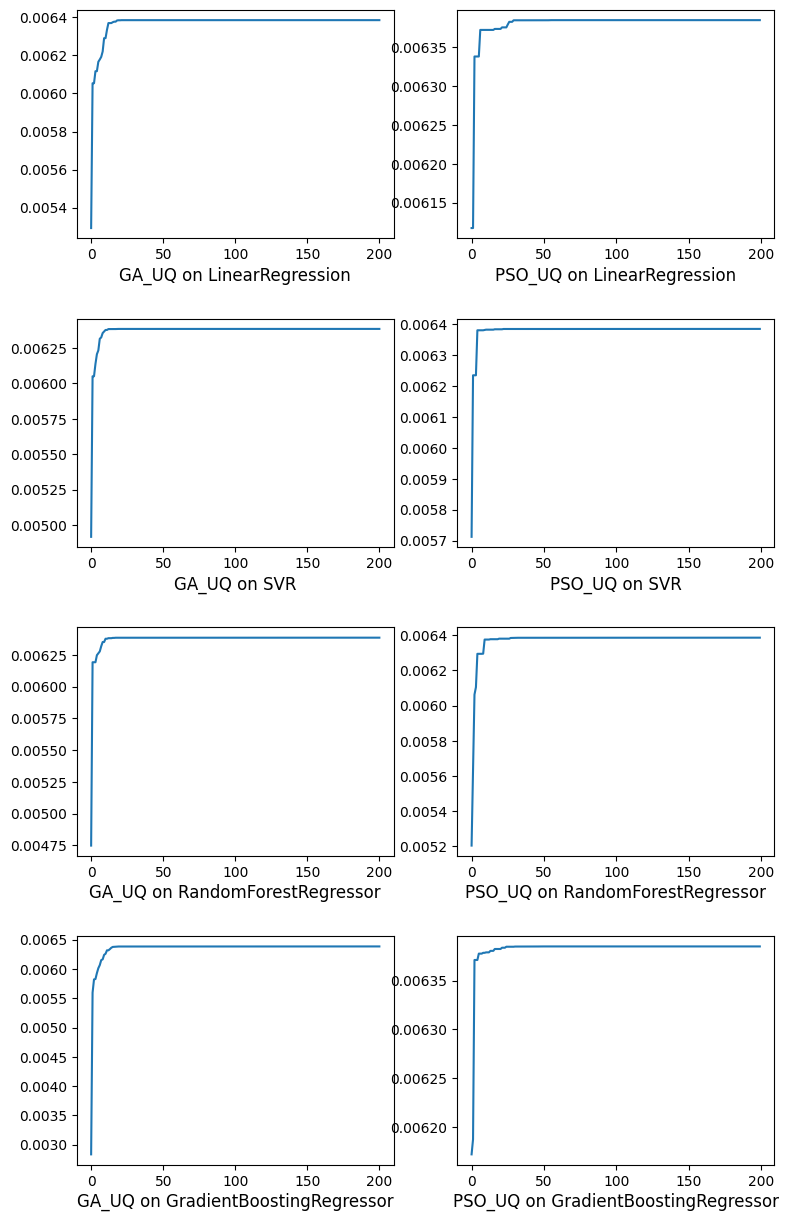

In [18]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(4,2,figsize=(9,15))
names=["LinearRegression","SVR","RandomForestRegressor","GradientBoostingRegressor"]
for i in range(4):
    y=np.maximum.accumulate(GA_instances[i].solutions_fitness)[::16]
    x=range(len(y))
    ax[i,0].plot(x,y)
    x=range(len(PSO_fitnesses[i]))
    y=PSO_fitnesses[i]
    ax[i,1].plot(x,y)
    ax[i,0].set_title("GA_UQ on "+names[i],y=-.22)
    ax[i,1].set_title("PSO_UQ on "+names[i],y=-.22)
plt.subplots_adjust(hspace=0.35)